# Rival Bros Coffee 2020 Item Sales Analysis

### what we'll take a look at:  
1.) Top Ten most popular items (per units sold)  
2.) Retail bag Sales  
3.) 12oz vs 16oz drinks(Americanos, Lattes, Chai)  



In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("item-summary-2020.csv")
df.head()

,Item Name,Item Variation,SKU,Category,Items Sold,Gross Sales,Items Refunded,Refunds,Discounts & Comps,Net Sales,Tax,Unit,Units Sold,Units Refunded
0,Custom Amount,No description,NaN,Uncategorized,12,$171.28,0,$0.00,$0.00,$171.28,$20.05,ea,12,0
1,"""The Regular"" - 12 pack",Cold Brew,NaN,Uncategorized,1,$44.00,0,$0.00,$0.00,$44.00,$3.52,ea,1,0
2,64 oz Cold Brew on Tap,Regular,NaN,Uncategorized,57,"$1,200.42",0,$0.00,$0.00,"$1,200.42",$95.90,ea,57,0
3,Americano,Hot 12oz,NaN,Uncategorized,393,"$1,122.72",-1,$-2.78,$0.00,"$1,119.94",$88.78,ea,393,-1
4,Americano,Hot 16oz (xtra shot incl),NaN,Uncategorized,204,$760.83,0,$0.00,$0.00,$760.83,$61.41,ea,204,0


In [4]:
df.drop(['SKU','Unit'], axis=1, inplace=True)


In [5]:
df.dtypes

Item Name            object
Item Variation       object
Category             object
Items Sold            int64
Gross Sales          object
Items Refunded        int64
Refunds              object
Discounts & Comps    object
Net Sales            object
Tax                  object
Units Sold            int64
Units Refunded        int64
dtype: object

In [6]:
df['Gross Sales'] = df['Gross Sales'].str.replace('\$','')
df['Gross Sales'] = df['Gross Sales'].str.replace(',','')
df['Gross Sales'] = df['Gross Sales'].astype(float)
df.dtypes

Item Name             object
Item Variation        object
Category              object
Items Sold             int64
Gross Sales          float64
Items Refunded         int64
Refunds               object
Discounts & Comps     object
Net Sales             object
Tax                   object
Units Sold             int64
Units Refunded         int64
dtype: object

This dataset has similar items listed under multiple names, so we'll need to combine them for accuracy.

In [7]:
df.shape

(512, 12)

In [8]:
df['Item'] = df['Item Name'] + '-' +df['Item Variation']
df['Item'] = df['Item'].str.replace('12 oz','12oz')
df['Item'] = df['Item'].str.replace('16 oz','12oz')
df['Item'] = df['Item'].str.replace(' 16oz','-16oz')
df['Item'] = df['Item'].str.replace(' 12oz','-12oz')
df['Item'] = df['Item'].str.replace(r" \(.*\)","")

df1 = df.groupby(['Item'], as_index=False).agg('sum') 

df1.shape

(385, 6)

a little better.

In [9]:
df1= df1.sort_values(by=['Gross Sales'],ascending=False)

df1.head(20)



,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
208,Latte-Regular,15661,63924.20,-3,15661,-3
75,Cold Brew-16oz Classic,16316,61065.72,-6,16316,-6
294,Revolver-12oz-Revolver-12oz,4208,56808.00,-2,4208,-2
48,Cappuccino-Regular,13734,52546.19,-17,13734,-17
168,Iced Cold Brew-Iced Cold Brew,12952,49920.28,-14,12952,-14
368,Whistle & Cuss-12oz-Whistle & Cuss-12oz,3049,44210.50,-4,3049,-4
114,Drip Small-Regular,16411,37998.11,-9,16411,-9
171,Iced Latte-Regular,6783,30531.00,-8,6783,-8
113,Drip Large-Regular,10808,30053.29,-5,10808,-5
206,Latte-ICED,5733,27867.18,-5,5733,-5


In [10]:
# we still have some cleaning to do.
df1['Item'] = df1['Item'].str.replace('-Regular Price','')
df1['Item'] = df1['Item'].str.replace('-Regular','')
df1['Item'] = df1['Item'].str.replace('large','Large')
df1['Item'] = df1['Item'].str.replace('large','Large')
df1['Item'] = df1['Item'].str.replace('-Hot','')
df1['Item'] = df1['Item'].str.replace('-Hot','')
df1['Item'] = df1['Item'].str.replace(' Hot & Iced','')

df1 = df1.groupby(['Item'], as_index=False).agg('sum') 

df1.head(20)





,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
0,"""The Regular"" - 12 pack-Cold Brew",1,44.00,0,1,0
1,12oz Coffee ToGo,8,18.49,0,8,0
2,16L,16,81.49,0,16,0
3,2pm With Flynn,18,58.32,0,18,0
4,4-PACK,109,1615.11,0,109,0
5,5 Lb Bag Bulk,7,560.00,0,7,0
6,5 Lb Bag Wholesale,1,60.00,0,1,0
7,64 oz Cold Brew on Tap,116,2443.14,0,116,0
8,ALT MILK/ breve,7685,5319.00,-2,7685,-2
9,Almond Croissant,1118,4190.26,-5,1118,-5


In [11]:
df1.shape



(375, 6)

In [12]:
df1= df1.sort_values(by=['Gross Sales'],ascending=False)

df1.head(25)



,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
198,Latte,15661,63924.20,-3,15661,-3
72,Cold Brew-16oz Classic,16316,61065.72,-6,16316,-6
285,Revolver-12oz-Revolver-12oz,4208,56808.00,-2,4208,-2
45,Cappuccino,13734,52546.19,-17,13734,-17
165,Iced Cold Brew-Iced Cold Brew,12952,49920.28,-14,12952,-14
358,Whistle & Cuss-12oz-Whistle & Cuss-12oz,3049,44210.50,-4,3049,-4
112,Drip Small,16411,37998.11,-9,16411,-9
166,Iced Latte,6783,30531.00,-8,6783,-8
111,Drip Large,10808,30053.29,-5,10808,-5
202,Latte-ICED,5733,27867.18,-5,5733,-5


In [13]:
df1['Item'] = df1['Item'].str.replace('Featherweight-12oz-Featherweight-12oz','Featherweight-12oz')
df1['Item'] = df1['Item'].str.replace('Whistle & Cuss-12oz-Whistle & Cuss-12oz','Whistle & Cuss-12oz')
df1['Item'] = df1['Item'].str.replace('Revolver-12oz-Revolver-12oz','Revolver-12oz')
df1['Item'] = df1['Item'].str.replace('Latte Latte-12oz','Latte-12oz')
df1['Item'] = df1['Item'].str.replace('Cold Brew-16oz Classic','Cold Brew-16oz')
df1['Item'] = df1['Item'].str.replace('Iced Cold Brew-Iced Cold Brew','Cold Brew-16oz')
df1['Item'] = df1['Item'].str.replace('Cold Brew-Iced Cold Brew','Cold Brew-16oz')
df1['Item'] = df1['Item'].str.replace('Latte-12oz','Latte')
df1['Item'] = df1['Item'].str.replace(r" \(.*\)","")
df1 = df1.groupby(['Item'], as_index=False).agg('sum') 
df1.shape

(368, 6)

In [14]:
df1= df1.sort_values(by=['Gross Sales'],ascending=False)

df1.head(25)

,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
72,Cold Brew-16oz,32918,125219.31,-21,32918,-21
195,Latte,23952,103631.60,-21,23952,-21
279,Revolver-12oz,5540,74790.00,-2,5540,-2
351,Whistle & Cuss-12oz,4250,61625.00,-4,4250,-4
45,Cappuccino,13734,52546.19,-17,13734,-17
111,Drip Small,16411,37998.11,-9,16411,-9
163,Iced Latte,6783,30531.00,-8,6783,-8
110,Drip Large,10808,30053.29,-5,10808,-5
125,Featherweight-12oz,2182,30002.50,-1,2182,-1
197,Latte-ICED,5733,27867.18,-5,5733,-5


In [15]:
df1['Item'] = df1['Item'].str.replace('Latte-Iced Latte','Iced Latte')
df1['Item'] = df1['Item'].str.replace('Latte-ICED','Iced Latte')
df1['Item'] = df1['Item'].str.replace('Drip Coffee-Large Coffee','Drip-Large')
df1['Item'] = df1['Item'].str.replace('Drip Large','Drip-Large')
df1['Item'] = df1['Item'].str.replace('Drip Coffee-Medium Coffee','Drip')
df1['Item'] = df1['Item'].str.replace('Drip Small','Drip')
df1['Item'] = df1['Item'].str.replace('BlackTop Nitro Can-12oz-BlackTop Nitro Can-12oz','Nitro Can')
df1['Item'] = df1['Item'].str.replace('Derringer/Cortado-Derringer/Cortado','Derringer')

df1 = df1.groupby(['Item'], as_index=False).agg('sum') 

df1.shape






(360, 6)

In [16]:
df1= df1.sort_values(by=['Gross Sales'],ascending=False)

df1.head(25)

,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
71,Cold Brew-16oz,32918,125219.31,-21,32918,-21
189,Latte,23952,103631.60,-21,23952,-21
271,Revolver-12oz,5540,74790.00,-2,5540,-2
106,Drip-Large,26064,72993.58,-18,26064,-18
157,Iced Latte,14972,70365.69,-15,14972,-15
104,Drip,28408,66027.47,-18,28408,-18
343,Whistle & Cuss-12oz,4250,61625.00,-4,4250,-4
44,Cappuccino,13734,52546.19,-17,13734,-17
119,Featherweight-12oz,2182,30002.50,-1,2182,-1
234,Nitro Can,4800,18909.82,-3,4800,-3


In [17]:
#create a top ten dataframe based on Gross Sales
gross_sales_top_ten = df1.head(10)

In [18]:
#create a top ten dataframe based on items sold

df1= df1.sort_values(by=['Items Sold'],ascending=False)

items_sold_top_ten = df1.head(10)

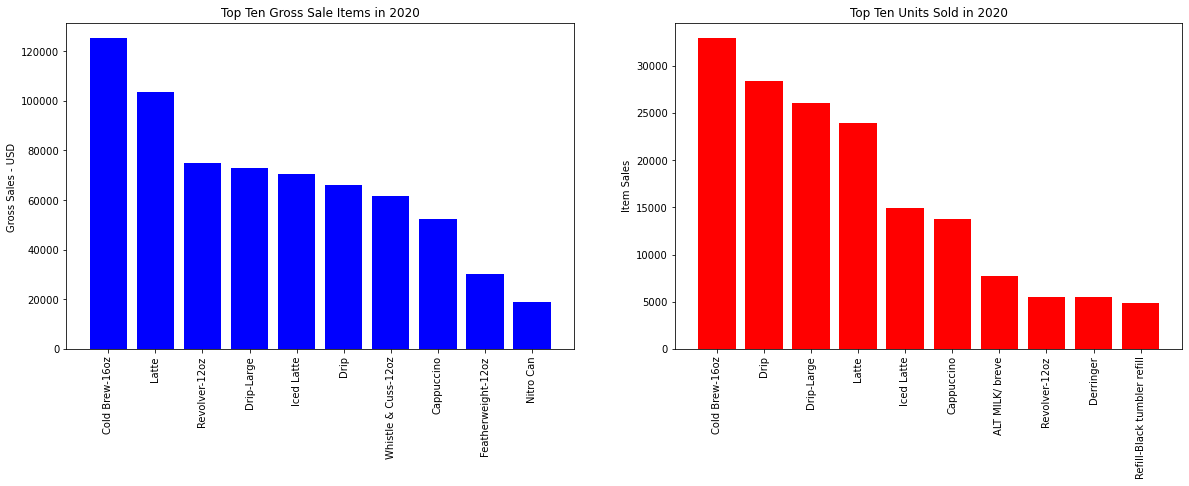

In [19]:
# graphs for top ten units sold and gross sales

xpos = np.arange(len(gross_sales_top_ten))
xpos1 = np.arange(len(items_sold_top_ten))

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.bar(xpos,gross_sales_top_ten['Gross Sales'],color='blue')
plt.xticks(xpos,gross_sales_top_ten['Item'],rotation = 'vertical')
plt.ylabel("Gross Sales - USD ")
plt.title("Top Ten Gross Sale Items in 2020")

plt.subplot(1,2,2)
plt.bar(xpos1,items_sold_top_ten['Items Sold'],color='red')
plt.xticks(xpos1,items_sold_top_ten['Item'],rotation = 'vertical')
plt.ylabel("Item Sales")
plt.title("Top Ten Units Sold in 2020")

plt.show()

Now, Let's take a look at just the retail bag sales.

In [20]:
bags = df1[df1['Item'].str.contains("12oz")]
bags.shape

(26, 6)

In [21]:
bags.head(26)

,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
271,Revolver-12oz,5540,74790.00,-2,5540,-2
343,Whistle & Cuss-12oz,4250,61625.00,-4,4250,-4
119,Featherweight-12oz,2182,30002.50,-1,2182,-1
11,Americano-12oz,1776,5012.82,-1,1776,-1
261,Red Eye-12oz Hot,917,3368.00,-1,917,-1
260,Red Eye-12oz,526,1705.89,0,526,0
223,Mocha-12oz,445,2170.10,0,445,0
309,Tea Latte-HOT-12oz,433,1841.98,0,433,0
49,Champion-12oz,432,6372.00,0,432,0
238,Palooka Decaf-12oz-Palooka-12oz,348,5133.00,0,348,0


In [22]:
bags = bags.drop([11,261,260,223,309,16,257,147,264,1,285,170], axis=0)
# I'm dropping the 1 bag of Kenya sold, as it must have been a leftover from 2019 and is too insignificant to include

In [23]:
bags.head(20)

,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
271,Revolver-12oz,5540,74790.00,-2,5540,-2
343,Whistle & Cuss-12oz,4250,61625.00,-4,4250,-4
119,Featherweight-12oz,2182,30002.50,-1,2182,-1
49,Champion-12oz,432,6372.00,0,432,0
238,Palooka Decaf-12oz-Palooka-12oz,348,5133.00,0,348,0
336,Ugly Sweater - Holiday Blend-12oz,274,4315.50,0,274,0
79,Costa Rica Natural - Cuatro Hermanas-12oz,180,3375.00,-1,180,-1
140,Honduras - Sabillon-12oz-Honduras - Sabillon P...,180,2925.00,-1,180,-1
338,Ugly Sweater-12oz,135,2126.25,-3,135,-3
239,Palooka-12oz,115,1696.25,0,115,0


In [24]:
# a little more cleaning of the item names
bags['Item'] = bags['Item'].str.replace('Palooka Decaf-12oz-Palooka-12oz','Palooka-12oz')
bags['Item'] = bags['Item'].str.replace('Honduras - Sabillon-12oz-Honduras','Honduras')
bags['Item'] = bags['Item'].str.replace('Ugly Sweater - Holiday Blend-12oz','Ugly Sweater-12oz')

bags = bags.groupby(['Item'], as_index=False).agg('sum') 

bags



,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
0,Champion-12oz,432,6372.00,0,432,0
1,Colombia - La Florida Best Cup-12oz,47,928.25,0,47,0
2,Costa Rica Natural - Cuatro Hermanas-12oz,180,3375.00,-1,180,-1
3,Featherweight-12oz,2182,30002.50,-1,2182,-1
4,Honduras - Sabillon Parainema,180,2925.00,-1,180,-1
5,Palooka-12oz,463,6829.25,0,463,0
6,Panama-12oz,114,2223.00,0,114,0
7,Revolver-12oz,5540,74790.00,-2,5540,-2
8,Rwanda Bukure -12oz,14,276.50,0,14,0
9,Sumatra Lintong --12oz,36,711.00,0,36,0


In [25]:
bags.shape

(12, 6)

In [26]:
bags= bags.sort_values(by=['Items Sold'],ascending=False)
bags


,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
7,Revolver-12oz,5540,74790.00,-2,5540,-2
11,Whistle & Cuss-12oz,4250,61625.00,-4,4250,-4
3,Featherweight-12oz,2182,30002.50,-1,2182,-1
5,Palooka-12oz,463,6829.25,0,463,0
0,Champion-12oz,432,6372.00,0,432,0
10,Ugly Sweater-12oz,409,6441.75,-3,409,-3
2,Costa Rica Natural - Cuatro Hermanas-12oz,180,3375.00,-1,180,-1
4,Honduras - Sabillon Parainema,180,2925.00,-1,180,-1
6,Panama-12oz,114,2223.00,0,114,0
1,Colombia - La Florida Best Cup-12oz,47,928.25,0,47,0


In [27]:
bags['Item'] = bags['Item'].str.replace('--12oz','')
bags['Item'] = bags['Item'].str.replace('-12oz','')
bags['Item'] = bags['Item'].str.replace('Costa Rica Natural - Cuatro Hermanas','Costa Rica')
bags['Item'] = bags['Item'].str.replace('Honduras - Sabillon Parainema','Honduras')
bags['Item'] = bags['Item'].str.replace('Colombia - La Florida Best Cup','Colombia')

bags


,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
7,Revolver,5540,74790.00,-2,5540,-2
11,Whistle & Cuss,4250,61625.00,-4,4250,-4
3,Featherweight,2182,30002.50,-1,2182,-1
5,Palooka,463,6829.25,0,463,0
0,Champion,432,6372.00,0,432,0
10,Ugly Sweater,409,6441.75,-3,409,-3
2,Costa Rica,180,3375.00,-1,180,-1
4,Honduras,180,2925.00,-1,180,-1
6,Panama,114,2223.00,0,114,0
1,Colombia,47,928.25,0,47,0


In [28]:
# my top 6 units sold are my blends, so i can split these off very easily
blends = bags.head(6)

In [29]:
# This splits out my Single origin bag sales
SingleOrigins = bags.tail(6)

In [30]:
singles=list(SingleOrigins['Items Sold'])
single_labels=list(SingleOrigins['Item'])

blender =list(blends['Items Sold'])
blend_labels = list(blends['Item'])

In [31]:
ytix = np.arange(0,7000,1000)

In [33]:
dex = np.arange(len(blend_labels))
dex1 = np.arange(len(single_labels))

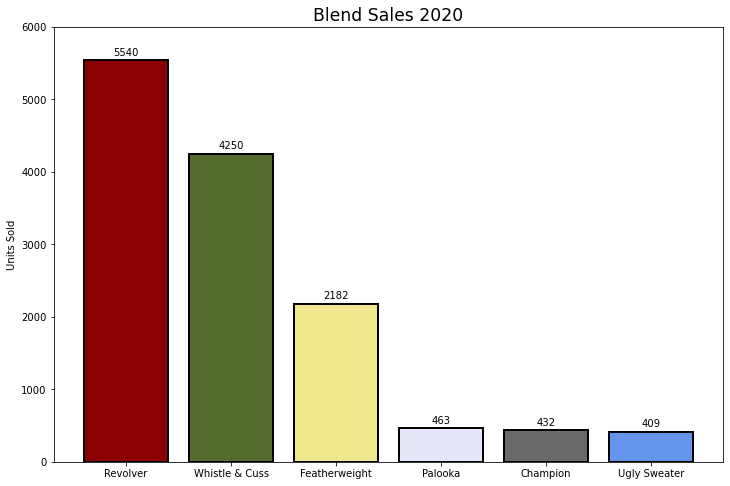

In [34]:
#Graph for retail blend bags
fig, ax = plt.subplots(figsize=(12,8))

rects1= ax.bar(dex,blender,color=['darkred','darkolivegreen','khaki','lavender','dimgrey','cornflowerblue'],edgecolor='black',linewidth=2)
ax.set_xticks(dex)
ax.set_xticklabels(blend_labels)
ax.set_yticks(ytix)
ax.set_ylabel("Units Sold")
ax.set_title("Blend Sales 2020", fontsize='xx-large')



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


plt.show()

In [35]:
ytix1 = np.arange(0,250,25)

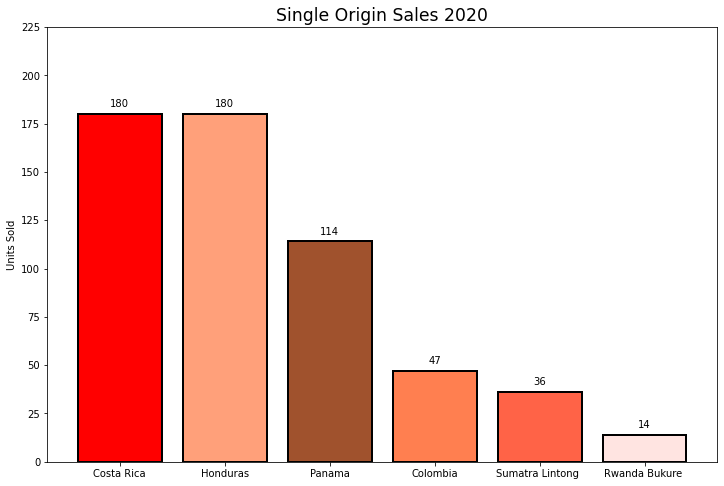

In [36]:
#Graph for retail single Origin bags


fig1, ax1 = plt.subplots(figsize=(12,8))

rects2 = ax1.bar(dex1,singles,color=['red','lightsalmon','sienna','coral','tomato','mistyrose'],edgecolor='black',linewidth=2)
ax1.set_xticks(dex1)
ax1.set_xticklabels(single_labels)
ax1.set_yticks(ytix1)
ax1.set_ylabel("Units Sold")
ax1.set_title("Single Origin Sales 2020", fontsize='xx-large')

def add_value_labels(ax1, spacing=5):

    
    for rect in ax1.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'
        label = y_value

        ax1.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

add_value_labels(ax1)


Next we'll take at look at some drinks.

# Drinks by size and style

This year, we added a new 16 oz size for a few of our drink options, Americanos, Lattes, Mochas, and Chai Lattes.  Let's see how the new sizing performed compared to the original 12oz serving and Iced versions.

In [37]:
Lattes = df1[df1['Item'].str.contains("Latte")] 
Lattes.shape

(15, 6)

In [38]:
Lattes.head(15)

,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
189,Latte,23952,103631.60,-21,23952,-21
157,Iced Latte,14972,70365.69,-15,14972,-15
307,Tea Latte,1686,6333.86,0,1686,0
191,Latte-Large,832,4365.16,0,832,0
45,Chai Tea Iced Latte,798,3782.23,0,798,0
296,Spiced Pumpkin Latte,498,2714.56,-2,498,-2
309,Tea Latte-HOT-12oz,433,1841.98,0,433,0
46,Chai Tea Latte Hot,408,1749.37,-2,408,-2
47,Chai Tea Latte-16oz Hot,393,2055.94,-2,393,-2
294,Spiced Pumpkin Latte,265,1419.50,0,265,0


In [40]:
Lattes['Item'] = Lattes['Item'].str.replace("-HOT",'')
Lattes['Item'] = Lattes['Item'].str.replace(" Hot",'')
Lattes['Item'] = Lattes['Item'].str.replace("12 oz",'12oz')

Lattes['Item'] = Lattes['Item'].str.replace("Large",'16oz')

Lattes = Lattes.groupby(['Item'], as_index=False).agg('sum') 


In [41]:
Lattes.head(20)

,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
0,Chai Tea Iced Latte,798,3782.23,0,798,0
1,Chai Tea Latte,408,1749.37,-2,408,-2
2,Chai Tea Latte-16oz,393,2055.94,-2,393,-2
3,Iced Latte,14972,70365.69,-15,14972,-15
4,Iced Latte-16oz,81,337.73,0,81,0
5,Iced Latte-20oz,15,76.42,0,15,0
6,Latte,23952,103631.60,-21,23952,-21
7,Latte-16oz,958,4977.82,0,958,0
8,Spiced Pumpkin Latte,265,1419.50,0,265,0
9,Spiced Pumpkin Latte,498,2714.56,-2,498,-2


In [42]:
#Drop unneeded rows.  I'll be dropping the spiced pumpkin latte, as it's sizing wasn't accurately recorded.
Lattes = Lattes.drop([8,9,5], axis=0)

In [43]:
Lattes['Item'] = Lattes['Item'].str.replace("Chai Tea Iced Latte",'Tea Iced Latte')
Lattes['Item'] = Lattes['Item'].str.replace("Tea Latte-12oz",'Tea Latte')
Lattes['Item'] = Lattes['Item'].str.replace("Chai Tea Latte",'Tea Latte')
Lattes['Item'] = Lattes['Item'].str.replace("Iced Latte-16oz",'Iced Latte')
Lattes = Lattes.groupby(['Item'], as_index=False).agg('sum') 

Lattes.head(20)



,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
0,Iced Latte,15053,70703.42,-15,15053,-15
1,Latte,23952,103631.60,-21,23952,-21
2,Latte-16oz,958,4977.82,0,958,0
3,Tea Iced Latte,919,4305.11,0,919,0
4,Tea Latte,2668,10477.78,-3,2668,-3
5,Tea Latte-16oz,393,2055.94,-2,393,-2


In [44]:
Americanos = df1[df1['Item'].str.contains("Americano")] 

Americanos.head(10)

,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
10,Americano,2950,8206.16,-1,2950,-1
11,Americano-12oz,1776,5012.82,-1,1776,-1
154,Iced Americano,1658,5779.26,0,1658,0
14,Americano-ICED,1253,4540.01,-5,1253,-5
16,Americano-Medium-12oz Hot,254,727.96,-1,254,-1
13,Americano-16oz,222,828.15,0,222,0
12,Americano-16oz,173,623.86,0,173,0
15,Americano-Large-16oz Hot,168,638.52,0,168,0
155,Iced Americano-16oz,35,121.45,0,35,0
156,Iced Americano-20oz,17,62.91,0,17,0


In [45]:
Americanos['Item'] = Americanos['Item'].str.replace("Americano-Medium-12oz Hot",'Americano-12oz')
Americanos['Item'] = Americanos['Item'].str.replace("Americano-12oz",'Americano')
Americanos['Item'] = Americanos['Item'].str.replace("Iced Americano",'Americano-ICED')
Americanos['Item'] = Americanos['Item'].str.replace("Americano-Large-16oz Hot",'Americano-16oz')


Americanos = Americanos.groupby(['Item'], as_index=False).agg('sum') 

Americanos





<ipython-input-45-f8cb33c49a4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Americanos['Item'] = Americanos['Item'].str.replace("Americano-Medium-12oz Hot",'Americano-12oz')
<ipython-input-45-f8cb33c49a4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Americanos['Item'] = Americanos['Item'].str.replace("Americano-12oz",'Americano')
<ipython-input-45-f8cb33c49a4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
0,Americano,4726,13218.98,-2,4726,-2
1,Americano-16oz,341,1262.38,0,341,0
2,Americano-16oz,222,828.15,0,222,0
3,Americano-ICED,2911,10319.27,-5,2911,-5
4,Americano-ICED-16oz,35,121.45,0,35,0
5,Americano-ICED-20oz,17,62.91,0,17,0
6,Americano-Medium-12oz Hot,254,727.96,-1,254,-1


In [46]:
Americanos['Item'] = Americanos['Item'].str.replace("Americano-ICED-16oz",'Americano-ICED')

Americanos['Item'] = Americanos['Item'].str.replace(r" \(.*\)","")


Americanos = Americanos.groupby(['Item'], as_index=False).agg('sum') 

Americanos



,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
0,Americano,4726,13218.98,-2,4726,-2
1,Americano-16oz,341,1262.38,0,341,0
2,Americano-16oz,222,828.15,0,222,0
3,Americano-ICED,2946,10440.72,-5,2946,-5
4,Americano-ICED-20oz,17,62.91,0,17,0
5,Americano-Medium-12oz Hot,254,727.96,-1,254,-1


In [47]:
Americanos['Item'] = Americanos['Item'].str.replace(" ",'_')
Americanos


,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
0,Americano,4726,13218.98,-2,4726,-2
1,Americano-16oz,341,1262.38,0,341,0
2,Americano-16oz_,222,828.15,0,222,0
3,Americano-ICED,2946,10440.72,-5,2946,-5
4,Americano-ICED-20oz,17,62.91,0,17,0
5,Americano-Medium-12oz__Hot,254,727.96,-1,254,-1


In [48]:
Americanos['Item'] = Americanos['Item'].str.replace("Americano-16oz_",'Americano-16oz')
Americanos = Americanos.groupby(['Item'], as_index=False).agg('sum') 

Americanos


,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
0,Americano,4726,13218.98,-2,4726,-2
1,Americano-16oz,563,2090.53,0,563,0
2,Americano-ICED,2946,10440.72,-5,2946,-5
3,Americano-ICED-20oz,17,62.91,0,17,0
4,Americano-Medium-12oz__Hot,254,727.96,-1,254,-1


In [49]:
Americanos['Item'] = Americanos['Item'].str.replace("Americano-Medium-12oz__Hot",'Americano'
                                                   )
Americanos = Americanos.groupby(['Item'], as_index=False).agg('sum') 

Americanos = Americanos.drop([3],axis=0)

Americanos


,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
0,Americano,4980,13946.94,-3,4980,-3
1,Americano-16oz,563,2090.53,0,563,0
2,Americano-ICED,2946,10440.72,-5,2946,-5


In [50]:
sizes = pd.concat([Lattes, Americanos], axis=0)

sizes

,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded
0,Iced Latte,15053,70703.42,-15,15053,-15
1,Latte,23952,103631.60,-21,23952,-21
2,Latte-16oz,958,4977.82,0,958,0
3,Tea Iced Latte,919,4305.11,0,919,0
4,Tea Latte,2668,10477.78,-3,2668,-3
5,Tea Latte-16oz,393,2055.94,-2,393,-2
0,Americano,4980,13946.94,-3,4980,-3
1,Americano-16oz,563,2090.53,0,563,0
2,Americano-ICED,2946,10440.72,-5,2946,-5


In [51]:
# I'm going to add a column with the appropriate sizing to organize this a little better.
sizing = ['Iced','12oz','16oz','Iced','12oz','16oz','12oz','16oz','Iced']

sizes['Type'] = sizing

sizes


,Item,Items Sold,Gross Sales,Items Refunded,Units Sold,Units Refunded,Type
0,Iced Latte,15053,70703.42,-15,15053,-15,Iced
1,Latte,23952,103631.60,-21,23952,-21,12oz
2,Latte-16oz,958,4977.82,0,958,0,16oz
3,Tea Iced Latte,919,4305.11,0,919,0,Iced
4,Tea Latte,2668,10477.78,-3,2668,-3,12oz
5,Tea Latte-16oz,393,2055.94,-2,393,-2,16oz
0,Americano,4980,13946.94,-3,4980,-3,12oz
1,Americano-16oz,563,2090.53,0,563,0,16oz
2,Americano-ICED,2946,10440.72,-5,2946,-5,Iced


In [53]:
sizes = sizes.drop(['Items Refunded','Units Refunded','Units Sold'], axis=1)
sizes

,Item,Items Sold,Gross Sales,Type
0,Iced Latte,15053,70703.42,Iced
1,Latte,23952,103631.60,12oz
2,Latte-16oz,958,4977.82,16oz
3,Tea Iced Latte,919,4305.11,Iced
4,Tea Latte,2668,10477.78,12oz
5,Tea Latte-16oz,393,2055.94,16oz
0,Americano,4980,13946.94,12oz
1,Americano-16oz,563,2090.53,16oz
2,Americano-ICED,2946,10440.72,Iced


In [54]:
sizes['Item'] = sizes['Item'].str.replace('-16oz','')
sizes['Item'] = sizes['Item'].str.replace('-ICED','')
sizes['Item'] = sizes['Item'].str.replace('Iced ','')

sizes



,Item,Items Sold,Gross Sales,Type
0,Latte,15053,70703.42,Iced
1,Latte,23952,103631.60,12oz
2,Latte,958,4977.82,16oz
3,Tea Latte,919,4305.11,Iced
4,Tea Latte,2668,10477.78,12oz
5,Tea Latte,393,2055.94,16oz
0,Americano,4980,13946.94,12oz
1,Americano,563,2090.53,16oz
2,Americano,2946,10440.72,Iced


In [56]:
sizepivot = sizes.pivot(index='Item', columns='Type', values='Items Sold')

sizepivot

Type,12oz,16oz,Iced
Item,,,
Americano,4980,563,2946
Latte,23952,958,15053
Tea Latte,2668,393,919


In [58]:
indx = np.arange(len(sizepivot))
sold_label = np.arange(0, 25000, 1000)
twelves = list(sizepivot['12oz'])
sixteens = list(sizepivot['16oz'])
iced = list(sizepivot['Iced'])

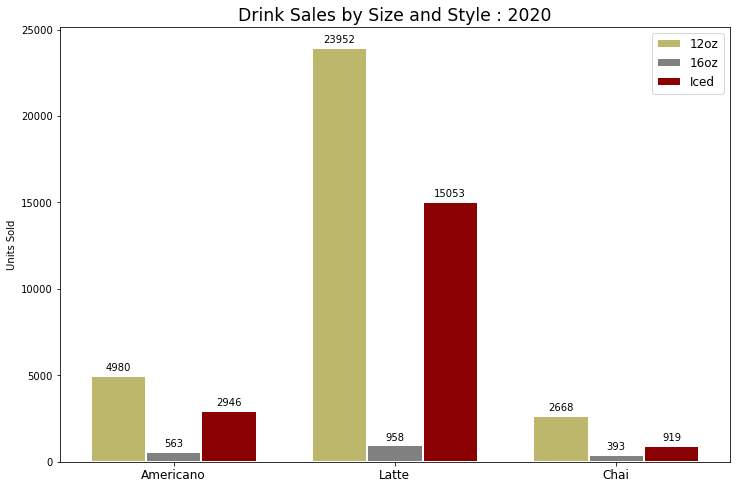

In [65]:
Drink_labels1 = ('Americano','Latte','Chai')
LegendLabels = ('12oz','16oz','Iced')
indx1 = np.arange(len(sizepivot))+.25
sold_label1 = np.arange(0, 26000, 5000)

x = np.arange(len(Drink_labels1))  # the label locations
barWidth = 0.25  # the width of the bars

r1 = np.arange(len(twelves))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(r1, twelves, width=barWidth,color='darkkhaki', edgecolor='white',linewidth =2)
rects2 = ax.bar(r2, sixteens, width=barWidth,color='grey', edgecolor='white',linewidth =2)
rects3 = ax.bar(r3, iced, width=barWidth,color='darkred', edgecolor='white',linewidth =2)

ax.set_ylabel('Units Sold')
ax.set_title("Drink Sales by Size and Style : 2020", fontsize='xx-large')
ax.set_xticks(indx1)
ax.set_yticks(sold_label1)
ax.set_xticklabels(Drink_labels1, fontsize='large')
ax.legend(LegendLabels,fontsize='large')


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


From this we can see that the 16 oz underperformed in comparison to other options, and we could potentially benefit from training employees to upsell better, or increase advertising awareness for this option.  It also worth considering that given the dataset, some 16 oz sales may have been incorrectly logged as 12oz.  